# Lab Overview
- Text Classification Models
  - MultinomialNB
  - Logistic Regression
  - Support Vector Classifier
  - Decision Tree Classifier
- Entitiy detection using spaCy
- Sentiment Mining
- Emotion Mining
- roBERTa and BERT models
- Topic Modeling

# Text Classification Models

**MultinomialNB** is a naive Bayes classifier suitable for discrete features, such as word counts. **LogisticRegression** implements logistic regression, a linear classifier. **SVC** is a support vector machine classifier. **DecisionTreeClassifier** builds a decision tree classifier.

### MultinomialNB (Multinomial Naive Bayes):

MultinomialNB is a probabilistic classifier that relies on Bayes' theorem and assumes that features follow a multinomial distribution. This makes it particularly well-suited for text classification tasks where features are discrete, such as word counts or term frequencies. MultinomialNB calculates the probability of a sample belonging to a specific class based on how frequently features appear in the training data. It assumes that features are conditionally independent given the class label. Due to its simplicity and efficiency, MultinomialNB is a popular choice for handling high-dimensional feature spaces in text classification.

### LogisticRegression (Logistic Regression):

LogisticRegression is a linear classifier that uses the logistic (sigmoid) function to model the relationship between input features and a binary target variable. It is designed for binary classification tasks, where the output is either 0 or 1. LogisticRegression estimates the probability that an instance belongs to a particular class by applying the logistic function. It learns feature weights (coefficients) to maximize the likelihood of the observed data. This classifier can handle both continuous and discrete input features and is widely used due to its simplicity, interpretability, and effectiveness across various classification problems.

### SVC (Support Vector Classifier):

SVC, a type of support vector machine (SVM) classifier, is a powerful and versatile tool for both linear and non-linear classification tasks. SVC aims to find an optimal hyperplane that separates data points of different classes with the largest possible margin. It achieves this by mapping input data into a higher-dimensional feature space using a kernel function. The decision boundary is determined by support vectors, which are the data points closest to the hyperplane. SVC is effective with high-dimensional data and performs well even when the number of features exceeds the number of samples.

### DecisionTreeClassifier (Decision Tree):

DecisionTreeClassifier constructs a decision tree, a flowchart-like structure where each internal node represents a feature, each branch represents a decision, and each leaf node represents an outcome or class label. The tree partitions the feature space recursively based on feature values to determine class labels. Decision trees are simple yet powerful classifiers capable of handling both categorical and numerical features. They are interpretable and can capture complex decision boundaries. DecisionTreeClassifier supports multi-class classification and can also be applied to regression tasks.

**Summary:**
These classifiers vary in their assumptions, algorithms, and capabilities:

- MultinomialNB is ideal for discrete features like word counts.
- LogisticRegression is a linear classifier suitable for a wide range of problems.
- SVC is a robust classifier for both linear and non-linear data.
- DecisionTreeClassifier builds decision trees that are easy to interpret and use for both classification and regression.

Each of these classifiers has unique strengths, making them suitable for different types of classification tasks.







In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
real_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake.csv')

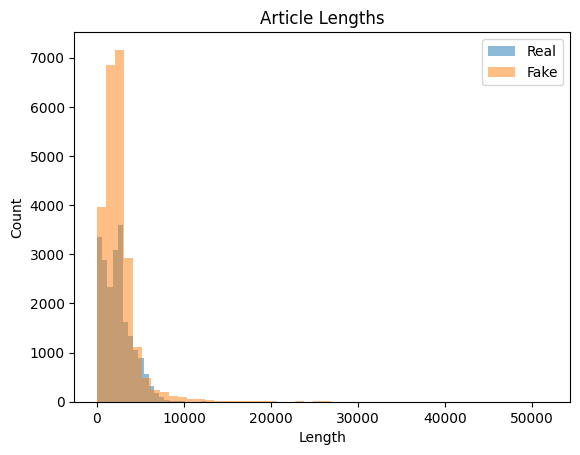

In [ ]:
# Calculate the lengths of real news articles
real_lengths = real_news['text'].apply(len)

# Calculate the lengths of fake news articles
fake_lengths = fake_news['text'].apply(len)

# Plot histograms of article lengths
plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
# Plot histogram for real news article lengths with 50 bins, 50% transparency, and labeled 'Real'

plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
# Plot histogram for fake news article lengths with 50 bins, 50% transparency, and labeled 'Fake'

# Add title and labels
plt.title('Article Lengths')  # Set the title of the plot
plt.xlabel('Length')          # Set the label for the x-axis
plt.ylabel('Count')           # Set the label for the y-axis

# Add legend to distinguish between real and fake news
plt.legend()

# Display the plot
plt.show()


In [ ]:
# Function to get the most common words from a list of texts
def get_most_common_words(texts, num_words=10):
    all_words = []
    # Tokenize and collect words from each text
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
        # Tokenize each text into words and convert to lowercase, then add to the all_words list

    stop_words = set(nltk.corpus.stopwords.words('english'))
    # Define a set of stop words in English

    # Filter out non-alphabetic words and stop words
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    # Create a list of words that are alphabetic and not in the stop words list

    word_counts = Counter(words)  # Count the frequency of each word
    return word_counts.most_common(num_words)  # Return the most common words and their frequencies

# Get the most common words from real news articles
real_words = get_most_common_words(real_news['text'])

# Get the most common words from fake news articles
fake_words = get_most_common_words(fake_news['text'])

# Print the most common words for real and fake news
print('Real News:', real_words)
print('Fake News:', fake_words)

Real News: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

In [ ]:
real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

**CountVectorizer** is a feature extraction technique in machine learning and natural language processing (NLP) that converts a collection of text documents into a matrix of word counts.

**fit_transform()** When applied to the vectorizer object using real_news
['text'], it transforms the text data into a matrix where each row corresponds to a document and each column represents a unique word (token) from the text. This method also learns the vocabulary from real_news['text'].

**transform()** After fitting, the transform() method uses the learned vocabulary to convert new text data into the same matrix format. For example, X_fake is created by applying transform() to fake_news['text'].

**Combining Data:** The matrices X_real and X_fake are stacked vertically using sp.vstack() to form a single matrix X, where each row represents a document and each column represents a word count.

**Creating Target Variable:**
The target variable y is created by concatenating two arrays: one of ones (for real news) and one of zeros (for fake news). This gives each document a binary classification label: 1 for real news and 0 for fake news.

In [ ]:
# Initialize a CountVectorizer object
vectorizer = CountVectorizer()
# Fit the vectorizer on the real news text and transform the text into a matrix of token counts
X_real = vectorizer.fit_transform(real_news['text'])
# Transform the fake news text into the same matrix format using the already fitted vectorizer
X_fake = vectorizer.transform(fake_news['text'])

# Stack the real and fake news matrices vertically to create a single feature matrix
X = sp.vstack([X_real, X_fake])
# Create a target variable y where real news is labeled as 1 and fake news as 0
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

# Split the dataset into training and testing sets
# X_train and y_train are used for training the model
# X_test and y_test are used for evaluating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testing and Training all of the Models

In [ ]:
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating MultinomialNB model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Logistic Regression model
print("Training and evaluating Logistic Regression model...")
log_reg = LogisticRegression(max_iter=200)
train_and_evaluate_model(log_reg, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Decision Tree model
print("Training and evaluating Decision Tree model...")
dec_tree = DecisionTreeClassifier()
train_and_evaluate_model(dec_tree,  X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC(kernel='linear')
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)
print()

Training and evaluating MultinomialNB model...
Accuracy: 0.9422
Precision: 0.9422
Recall: 0.9422
F1-score: 0.9422

Training and evaluating Logistic Regression model...
Accuracy: 0.9950
Precision: 0.9950
Recall: 0.9950
F1-score: 0.9950

Training and evaluating Decision Tree model...
Accuracy: 0.9951
Precision: 0.9951
Recall: 0.9951
F1-score: 0.9951

Training and evaluating Support Vector Machine model...
Accuracy: 0.9950
Precision: 0.9950
Recall: 0.9950
F1-score: 0.9950



# Entity Detection

Named Entity Recognition, commonly referred to as NER, is a natural language processing (NLP) technique that is used to extract, highlight, or recognize key entities, primarily proper nouns and significant keywords, from unstructured text data.

**Types of Named Entities**
- People: Names of individuals.
- Organizations: Names of companies or institutions.
- Locations: Geographical names, including cities, countries, and landmarks.
- Dates: Specific dates or periods.
Productions: Titles of books, movies, etc.

spaCy is an open-source NLP library in Python, designed to handle a variety of NLP tasks, including Named Entity Recognition. It is specifically tailored for production use and provides a fast statistical entity recognition system.

**Because these models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later, depending on your use case.**

In [ ]:
import pandas as pd
import spacy
import requests
from bs4 import BeautifulSoup
nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_rows", 200)

In [ ]:
content = "Democrats and Australians said this was cool! Trinamool Congress leader Mahua Moitra has moved the Supreme Court against her expulsion from the Lok Sabha over the cash-for-query allegations against her. Moitra was ousted from the Parliament last week after the Ethics Committee of the Lok Sabha found her guilty of jeopardising national security by sharing her parliamentary portal's login credentials with businessman Darshan Hiranandani."

# Process the text content using a natural language processing model, 'nlp', to analyze the text
doc = nlp(content)

# Iterate through the named entities identified in the processed document
for ent in doc.ents:
    # Print the text of each entity, its start and end character positions in the original content, and its label (type of entity)
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Democrats 0 9 NORP
Australians 14 25 NORP
Congress 56 64 ORG
Mahua Moitra 72 84 PERSON
the Supreme Court 95 112 ORG
the Lok Sabha 140 153 PERSON
Moitra 203 209 ORG
Parliament 230 240 ORG
last week 241 250 DATE
the Ethics Committee 257 277 ORG
Darshan Hiranandani 419 438 PERSON


In [ ]:
from spacy import displacy
# Use displacy to render the named entities in the text content visually
displacy.render(doc, style="ent")

In [ ]:
import spacy
from spacy.tokens import Span

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Your text content
content = "Trinamool Congress leader Mahua Moitra has moved the Supreme Court against her expulsion from the Lok Sabha over the cash-for-query allegations against her. Moitra was ousted from the Parliament last week after the Ethics Committee of the Lok Sabha found her guilty of jeopardising national security by sharing her parliamentary portal's login credentials with businessman Darshan Hiranandani."

# Process the content
doc = nlp(content)

# Print entities before correction
ents_before = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print('Before:', ents_before)

# Create a list to store the updated entities
updated_ent = []

# Iterate over the entities in the document
for ent in doc.ents:
    # Check if the entity is "the Lok Sabha" and incorrectly labeled as PERSON
    if ent.text == "the Lok Sabha" and ent.label_ == "PERSON":
        # Create a new span with the correct label ORG
        updated_ent.append(Span(doc, ent.start, ent.end, label="ORG"))
    # Check if the entity is "Moitra" and incorrectly labeled as ORG
    elif ent.text == "Moitra" and ent.label_ == "ORG":
        # Create a new span with the correct label PERSON
        updated_ent.append(Span(doc, ent.start, ent.end, label="PERSON"))
    else:
        # If the entity is correctly labeled, add it to the updated entities list
        updated_ent.append(ent)

# Assign the corrected entities to the document
doc.ents = updated_ent

# Print entities after correction
ents_after = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print('After:', ents_after)


Before: [('Congress', 10, 18, 'ORG'), ('Mahua Moitra', 26, 38, 'PERSON'), ('the Supreme Court', 49, 66, 'ORG'), ('the Lok Sabha', 94, 107, 'PERSON'), ('Moitra', 157, 163, 'ORG'), ('Parliament', 184, 194, 'ORG'), ('last week', 195, 204, 'DATE'), ('the Ethics Committee', 211, 231, 'ORG'), ('Darshan Hiranandani', 373, 392, 'PERSON')]
After: [('Congress', 10, 18, 'ORG'), ('Mahua Moitra', 26, 38, 'PERSON'), ('the Supreme Court', 49, 66, 'ORG'), ('the Lok Sabha', 94, 107, 'ORG'), ('Moitra', 157, 163, 'PERSON'), ('Parliament', 184, 194, 'ORG'), ('last week', 195, 204, 'DATE'), ('the Ethics Committee', 211, 231, 'ORG'), ('Darshan Hiranandani', 373, 392, 'PERSON')]


In [ ]:
# Extract sentences containing a specific entity
entity_of_interest = "Moitra"
sentences_with_entity = [sent.text for sent in doc.sents if entity_of_interest in sent.text]
print(f"Sentences with {entity_of_interest}:")
for sent in sentences_with_entity:
    print(sent)

Sentences with Moitra:
Trinamool Congress leader Mahua Moitra has moved the Supreme Court against her expulsion from the Lok Sabha over the cash-for-query allegations against her.
Moitra was ousted from the Parliament last week after the Ethics Committee of the Lok Sabha found her guilty of jeopardising national security by sharing her parliamentary portal's login credentials with businessman Darshan Hiranandani.


In [ ]:
from collections import Counter
from itertools import combinations

# Find co-occurrences of entities
# Extract the text of all entities in the document
entities_text = [ent.text for ent in doc.ents]

# Generate all possible pairs of entities (co-occurrences)
co_occurrences = list(combinations(entities_text, 2))

# Count the occurrences of each entity pair
co_occurrence_count = Counter(co_occurrences)

# Print the co-occurrences and their counts
print("\nCo-Occurrences:")
for (entity1, entity2), count in co_occurrence_count.items():
    print(f"{entity1} - {entity2}: {count}")


Co-Occurrences:
Congress - Mahua Moitra: 1
Congress - the Supreme Court: 1
Congress - the Lok Sabha: 1
Congress - Moitra: 1
Congress - Parliament: 1
Congress - last week: 1
Congress - the Ethics Committee: 1
Congress - Darshan Hiranandani: 1
Mahua Moitra - the Supreme Court: 1
Mahua Moitra - the Lok Sabha: 1
Mahua Moitra - Moitra: 1
Mahua Moitra - Parliament: 1
Mahua Moitra - last week: 1
Mahua Moitra - the Ethics Committee: 1
Mahua Moitra - Darshan Hiranandani: 1
the Supreme Court - the Lok Sabha: 1
the Supreme Court - Moitra: 1
the Supreme Court - Parliament: 1
the Supreme Court - last week: 1
the Supreme Court - the Ethics Committee: 1
the Supreme Court - Darshan Hiranandani: 1
the Lok Sabha - Moitra: 1
the Lok Sabha - Parliament: 1
the Lok Sabha - last week: 1
the Lok Sabha - the Ethics Committee: 1
the Lok Sabha - Darshan Hiranandani: 1
Moitra - Parliament: 1
Moitra - last week: 1
Moitra - the Ethics Committee: 1
Moitra - Darshan Hiranandani: 1
Parliament - last week: 1
Parliamen

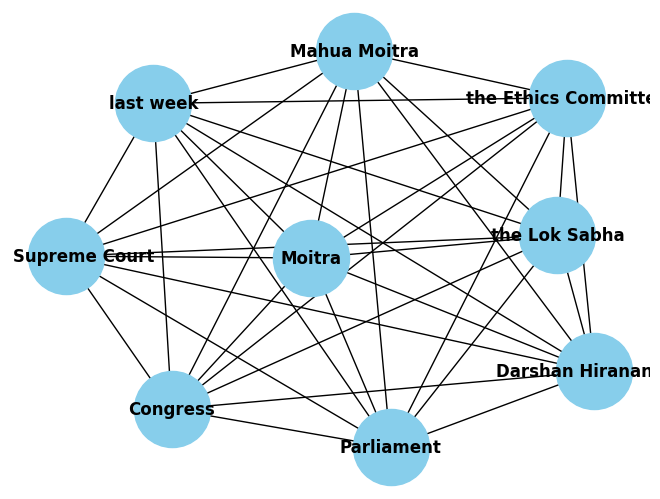

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges
for (entity1, entity2), count in co_occurrence_count.items():
    G.add_edge(entity1, entity2, weight=count)

# Draw the graph
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold")
plt.show()

#Sentiment Mining (VADER)
https://github.com/cjhutto/vaderSentiment

- pip install method
- Positive, Neutral, Negative
- Rule-based approach that provides sentiment scores for individual words and combines them to give an overall sentiment score for a piece of text.

Step 1: Install the necessary libraries First, you'll need to install the nltk library and download the VADER lexicon. You can do this by running the following commands:

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Step 2: Import the required libraries Next, import the necessary libraries for sentiment analysis and VADER:

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

Step 3: Initialize the SentimentIntensityAnalyzer Create an instance of the SentimentIntensityAnalyzer class, which is responsible for analyzing the sentiment of a given text:

In [ ]:
sia = SentimentIntensityAnalyzer()

Step 4: Analyze the sentiment of a text Use the polarity_scores() method of the SentimentIntensityAnalyzer object to analyze the sentiment of a given text. This method returns a dictionary containing the sentiment scores for the text, including a compound score, which represents the overall sentiment:

In [ ]:
text = "I love using VADER for sentiment analysis!"
scores = sia.polarity_scores(text)

In [ ]:
scores

print("Positive score:", scores['pos'])
print("Negative score:", scores['neg'])
print("Neutral score:", scores['neu'])
print("Compound score:", scores['compound'])

Positive score: 0.473
Negative score: 0.0
Neutral score: 0.527
Compound score: 0.6696


Example with Multiple Sentences

In [ ]:
from nltk.corpus import twitter_samples

nltk.download('twitter_samples')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [ ]:
print(positive_tweets[:5])
print(negative_tweets[:5])

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']
['hopeless for tmr :(', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(", '@Hegelbon That heart sliding into the waste basket. :(', '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too', 'Dang starting next week I have "work" :(']


In [ ]:
import pandas as pd

In [ ]:
df_pos = pd.DataFrame({'text': positive_tweets})
df_neg = pd.DataFrame({'text': negative_tweets})


In [ ]:
df_pos

,text
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,@RachelLiskeard Thanks for the shout-out :) It...
4997,@side556 Hey! :) Long time no talk...
4998,@staybubbly69 as Matt would say. WELCOME TO AD...


In [ ]:
df_pos['compound'] = df_pos['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_pos

,text,compound
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0.7579
1,@Lamb2ja Hey James! How odd :/ Please call our...,0.6229
2,@DespiteOfficial we had a listen last night :)...,0.7959
3,@97sides CONGRATS :),0.7983
4,yeaaaah yippppy!!! my accnt verified rqst has...,0.7950
...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",0.8122
4996,@RachelLiskeard Thanks for the shout-out :) It...,0.8779
4997,@side556 Hey! :) Long time no talk...,0.2714
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,0.7739


In [ ]:
df_neg

,text
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("
...,...
4995,I wanna change my avi but uSanele :(
4996,MY PUPPY BROKE HER FOOT :(
4997,where's all the jaebum baby pictures :((
4998,But but Mr Ahmad Maslan cooks too :( https://t...


In [ ]:
df_neg['compound'] = df_neg['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_neg

,text,compound
0,hopeless for tmr :(,-0.7096
1,Everything in the kids section of IKEA is so c...,-0.3425
2,@Hegelbon That heart sliding into the waste ba...,-0.6908
3,"“@ketchBurning: I hate Japanese call him ""bani...",-0.7650
4,"Dang starting next week I have ""work"" :(",-0.4404
...,...,...
4995,I wanna change my avi but uSanele :(,-0.5927
4996,MY PUPPY BROKE HER FOOT :(,-0.7531
4997,where's all the jaebum baby pictures :((,0.0000
4998,But but Mr Ahmad Maslan cooks too :( https://t...,-0.5927


# Emotion Mining (EmoLex)
- String matching method
- Eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive)
- Dictionary-based approach

https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

Download http://saifmohammad.com/WebDocs/Lexicons/NRC-Emotion-Lexicon.zip

Step 1: Download the NRC Emotion Lexicon and Upload it to Google Colab

Step 2: Import the required libraries



In [ ]:
import pandas as pd
import re

Step 3: Load the NRC Emotion Lexicon

In [ ]:
lexicon = {}

# read text file into pandas DataFrame
df = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep="\t", header=None)
df

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141535,zoom,negative,0
141536,zoom,positive,0
141537,zoom,sadness,0
141538,zoom,surprise,0


In [ ]:
for index, row in df.iterrows():
  word, emotion, value = row[0], row[1], int(row[2])
  if word in lexicon:
      lexicon[word][emotion] = value
  else:
      lexicon[word] = {emotion: value}

In [ ]:
lexicon

{'aback': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,
  'trust': 0},
 'abacus': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,
  'trust': 1},
 'abandon': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 0,
  'trust': 0},
 'abandoned': {'anger': 1,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 0,
  'trust': 0},
 'abandonment': {'anger': 1,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 1,
  'trust': 0},
 'abate': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,


Step 4: Define the text preprocessing function

In [ ]:
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

Step 5: Perform emotion analysis on text

In [ ]:
def analyze_emotions(text):
    emotions = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive':0, 'sadness': 0, 'surprise': 0, 'trust': 0}
    words = preprocess_text(text).split()

    for word in words:
        if word in lexicon:
            for emotion, value in lexicon[word].items():
                emotions[emotion] += value

    return emotions

Step 8: Example usage

In [ ]:
# Example usage
text = "I am so excited about this SRA project! It's going to be amazing."

emotions = analyze_emotions(text)

In [ ]:
emotions

{'anger': 0,
 'anticipation': 1,
 'disgust': 0,
 'fear': 0,
 'joy': 1,
 'negative': 0,
 'positive': 1,
 'sadness': 0,
 'surprise': 1,
 'trust': 1}

Limitations of Bag-of-Words

- It ignores the order of the word, for example, this is bad = bad is this.
- It ignores the context of words. Suppose If I write the sentence “He loved books. Education is best found in books”. It would create two vectors one for “He loved books” and other for “Education is best found in books.” It would treat both of them orthogonal which makes them independent, but in reality, they are related to each other
- It is sensitive to spelling

# roBERTa-base model

RoBERTa (Robustly Optimized BERT Approach) is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model. Like BERT, RoBERTa is a transformer-based language model that uses self-attention to process input sequences and generate contextualized representations of the words within the sentence. One key difference between RoBERTa and BERT is that RoBERTa was trained on a much larger dataset.

## Key Features of RoBERTa and BERT

- **Bidirectional Context Understanding:**
Traditional language models read text in a single direction, either left-to-right or right-to-left. BERT, however, processes text bidirectionally. This means BERT reads the text in both directions simultaneously, allowing it to grasp the full context of a word based on the words that come before and after it.

- **Transformers Architecture:**
BERT is built on the Transformer architecture, which relies on self-attention mechanisms. Transformers can model the relationships between all words in a sentence simultaneously, making them highly effective at capturing contextual information. The self-attention mechanism enables BERT to weigh the importance of different words when interpreting a sentence, regardless of their position.
- **Tokens and Embeddings:**
BERT tokenizes input text into smaller units (tokens) and converts these tokens into numerical vectors (embeddings). These embeddings capture the semantic meaning of the tokens and their context within the sentence.

## Hate Classification

In [ ]:
!pip install transformers
!pip install tweetnlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 M

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import nltk
from nltk.corpus import twitter_samples

import tweetnlp
model = tweetnlp.Classifier("cardiffnlp/twitter-roberta-base-hate-latest")
hate = model.predict('All people should die')
not_hate = model.predict('I love everyone')
print(hate)
print(not_hate)


{'label': 'HATE'}
{'label': 'NOT-HATE'}


In [ ]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification, AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import nltk
from nltk.corpus import twitter_samples
import tweetnlp

# Function to preprocess text by replacing usernames and URLs with placeholders
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        # Replace usernames (starting with '@') with '@user'
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        # Replace URLs (starting with 'http') with 'http'
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)  # Return the processed text as a single string

# Download the twitter_samples dataset
nltk.download('twitter_samples')

# Load a subset of positive and negative tweets from the twitter_samples dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')[:50]
negative_tweets = twitter_samples.strings('negative_tweets.json')[:50]

# Initialize the tweetnlp model for hate speech detection
model = tweetnlp.Classifier("cardiffnlp/twitter-roberta-base-hate-latest")

# Function to predict the sentiment of a list of tweets
def predict_tweets(tweets):
    predictions = []
    for tweet in tweets:
        preprocessed_tweet = preprocess(tweet)  # Preprocess the tweet
        result = model.predict(preprocessed_tweet)  # Get the prediction for the preprocessed tweet
        predictions.append((preprocessed_tweet, result))  # Append the preprocessed tweet and its prediction to the results list
    return predictions

# Get predictions for positive and negative tweets
positive_predictions = predict_tweets(positive_tweets)
negative_predictions = predict_tweets(negative_tweets)

# Display some predictions for positive tweets
print("Positive Tweets Predictions:")
for tweet, result in positive_predictions:
    print(f"Tweet: {tweet}\nPrediction: {result}\n")

# Display some predictions for negative tweets
print("Negative Tweets Predictions:")
for tweet, result in negative_predictions:
    print(f"Tweet: {tweet}\nPrediction: {result}\n")


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Positive Tweets Predictions:
Tweet: #FollowFriday @user @user @user for being top engaged members in my community this week :)
Prediction: {'label': 'NOT-HATE'}

Tweet: @user Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Prediction: {'label': 'NOT-HATE'}

Tweet: @user we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Prediction: {'label': 'NOT-HATE'}

Tweet: @user CONGRATS :)
Prediction: {'label': 'NOT-HATE'}

Tweet: yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Prediction: {'label': 'NOT-HATE'}

Tweet: @user @user This one is irresistible :)
#FlipkartFashionFriday http
Prediction: {'label': 'NOT-HATE'}

Tweet: We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) http
Prediction: {'label': 'NOT-HATE'}

Tweet: @user On second thought, there’s just not enough time fo

# Topic Modeling (LDA)

Topic modeling is a form of unsupervised classification technique used to discover underlying themes within large collections of text. Think of it as a method for organizing a vast library where the content of each book is unknown. By applying topic modeling, we can identify the main themes (or topics) and systematically categorize these texts.

Latent Dirichlet Allocation (LDA) is considered one of the most popular topic modeling methods. Here’s a closer look at what this entails:

- Latent means hidden, referring to features that we cannot directly observe but can infer through analysis.
- Dirichlet refers to a specific type of probability distribution that helps in determining the likelihood of different topics.

LDA treats each document (like a book or an article) as a combination of topics, and each topic as a combination of words. This approach reflects the natural way language is used, where a single text may cover multiple themes. For instance, a science article might discuss "climate change," "renewable energy," and "pollution" within the same piece. LDA allows these themes to overlap rather than forcing each document into a single category.

Key information for LDA:
- We already know the words that are within a document.
- The analysis will help up calculate a probability that the words belong to a topic

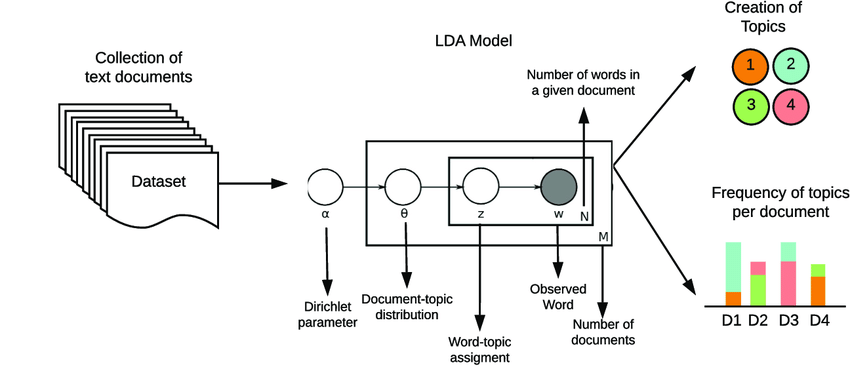

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00


## Importing the required packages

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading the dataset

In [ ]:
real_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the 'text' column of the real_news DataFrame to a list
texts = real_news['text'].tolist()

# Preprocess text: Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenize and lemmatize the text
    tokens = nltk.word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatize the tokens, filter out non-alphanumeric tokens and stop words
    return ' '.join(tokens)  # Join the processed tokens back into a single string

# Apply the preprocess function to each text in the list
processed_texts = [preprocess(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Vectorize text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Create a document-term matrix using CountVectorizer with specific parameters:
# - max_df=0.95: Ignore terms that appear in more than 95% of the documents
# - min_df=2: Ignore terms that appear in fewer than 2 documents
# - stop_words='english': Remove common English stop words
dtm = vectorizer.fit_transform(processed_texts)

# Apply LDA
num_topics = 5  # Set the number of topics to find
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# Initialize the LDA model with the specified number of topics and a random state for reproducibility
lda.fit(dtm)  # Fit the LDA model to the document-term matrix

# Function to display topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        # Print the top words for each topic
        # topic.argsort()[:-num_top_words - 1:-1] sorts the indices of the words by their importance in the topic

num_top_words = 10  # Set the number of top words to display for each topic
tf_feature_names = vectorizer.get_feature_names_out()  # Get the feature names (words) from the vectorizer
display_topics(lda, tf_feature_names, num_top_words)  # Display the topics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
said state tax government syria islamic force saudi syrian iran
Topic 1:
said trump republican party election president state vote clinton new
Topic 2:
said trump state president united north china korea administration washington
Topic 3:
said people police year government state country group city attack
Topic 4:
said trump president election committee court campaign house official investigation


## Visualizing the Topic Model



In [ ]:
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(lda, dtm, vectorizer, mds='tsne')
panel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=                x          y  topics  cluster       Freq
topic                                                   
1      100.669174 -14.323631       1        1  29.119351
2       15.587319 -75.240730       2        1  22.853230
3       82.413261  92.969826       3        1  18.338420
4      -79.672035 -22.993689       4        1  16.410454
0      -17.997629  62.236126       5        1  13.278545, topic_info=             Term          Freq         Total Category  logprob  loglift
32657       trump  54023.000000  54023.000000  Default  30.0000  30.0000
31599         tax   9078.000000   9078.000000  Default  29.0000  29.0000
26832  republican  22211.000000  22211.000000  Default  28.0000  28.0000
17997       korea   7084.000000   7084.000000  Default  27.0000  27.0000
6291        china   8365.000000   8365.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
6491         city   1787.249083   6222.232130   Topic5  -5.7733   0.7716
7777      country   1965.929829  13733.833894   Topic5  -5.6780   0.0751
22590    official   1873.571337  14397.954017   Topic5  -5.7262  -0.0202
33341      united   1851.839970  15264.983537   Topic5  -5.7378  -0.0904
23808     percent   1657.766479   9911.710146   Topic5  -5.8485   0.2308

[434 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
1482       1  0.045461  administration
1482       2  0.745846  administration
1482       3  0.011304  administration
1482       4  0.141730  administration
1482       5  0.055671  administration
...      ...       ...             ...
35484      2  0.020310            zika
35484      3  0.976569            zika
35484      5  0.001692            zika
35485      3  0.999083        zimbabwe
35533      3  0.998177            zuma

[1022 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])